## DeepLearning 2일차
- 딥러닝 1일차, 노드01~02, 가위/바위/보 이미지 구분 등 실 사례 통해 익숙해지기
- 딥러닝 2일차, 노드03~06, 딥러닝의 필수 개념 정리

### 노드03 딥러닝이란?

#### 노드03-01 인공신경망
- 인공신경망은 인간 두뇌의 뉴런, 시냅스의 상호작용을 모방하였음(인공뉴런,퍼셉트론)
- 인공뉴런의 특성
  - 신경세포 구조를 단순화 하여 모델링한 구조
  - 노드(node)와 엣지(edge)로 표현
  - 하나의 노드 안에서 입력(inputs)과 가중치(weights)를 곱하고 더하는 선형구조
  - 활성화 함수(activation function)을 통한 비선형 구조 표현 가능
- 딥러닝 구성
  - 입력층
  - 은닉층
  - 출력층

#### 노드03-02 인공신경망 역사
- 최초의 인공신경망 '퍼셉트론(Perceptron)'
- 퍼셉트론 vs 생체 신경망

| 분류        | 퍼셉트론 표현 | 생체신경망 설명 |
|----------------|------------------------|------------------------------|
| 입력           | xᵀ = (x₁, x₂, ..., xₙ)              | 이전 뉴런이 발화한 신호                          |
| 가중치         | wᵀ = (w₁, w₂, ..., wₙ)              | 시냅스의 연결 강도                               |
| 입력×가중치     | wᵢxᵢ (i = 1, 2, ..., n)              | 연결 강도에 따라 신호가 강해지거나 약해지는 과정 |
| 가중 합산       | z = ∑ wᵢxᵢ + b                      | 세포체에서 신호를 모으는 과정                    |
| 활성 함수       | f(z) = 1 if z ≥ 0 else 0           | 세포체의 발화 과정                               |
| 출력           | f(x) = f(wᵀx + b)                  | 축삭을 따라 시냅스로 전달되는 과정   

- 퍼셉트론으로는 XOR 같은 비선형 문제 해결 불가
  - MLP(Multi-Layer-perceptron) 등장하게 됨

#### 노드03-03 딥러닝 역사
- 일반신경망 : 데이터에서 feature추출한 뒤, 특징 벡터 통해 모델 학습
- 딥러닝 신경망 : 특징추출과 학습 함께 수행
- 딥러닝은 자연어 처리, 이미지 처리, 음성 인식 등에서 급격한 발전
- 딥러닝 모델의 문제
  - 기울기 소실 문제(Vanishing Gradient Problem)
    - 활성화 함수, tanh, sigmoid 대신 Relu 등을 사용
  - 과적합 문제
    - 규제화 기법(Regularization)
    - 드롭 아웃(Drop out)
    - 배치 정규화(Batch Normalization)
- 딥러닝의 발전
  - 제프리 힌튼(Geoffrey Hinton)
    - 역전파(Backpropagation, 1986)
    - 볼츠만 머슨(Boltzmann machine, 1983)
    - 컨볼루션 신경망 개선(2012)
  - 조슈아 벤지오(Yoshua Bengio)
    - 시퀀스의 확률 모델(1990)
    - 고차원 단어 임베딩 및 어텐션(2000)
    - 생성적 적대 네트워크(2010)
  - 얀 르쿤(Yann Lecun)
    - 컨볼루션 신경망(1980)
    - 역전파 알고리즘 개선
    - 신경망의 비전 확장

### 노드04 텐서 포현과 연산

#### 노드04-01 텐서
- 텐서 차원별 예시, 특징 비교표

| 차원 수 | 텐서 형태 예시      | Shape 예시           | 실제 활용 예시                                   | 설명                                   |
|---------|---------------------|-----------------------|--------------------------------------------------|----------------------------------------|
| 0차원   | 스칼라               | `()`                  | 손실값(loss), 정확도(acc), 단일 수치             | 단일 숫자값                            |
| 1차원   | 벡터                | `(n,)`                | 클래스 확률 벡터, bias 벡터 등                   | 1열짜리 배열                           |
| 2차원   | 행렬                | `(n, m)`              | 입력 데이터 (샘플×특성), 임베딩, 이미지(gray)     | 데이터 표 형태                         |
| 3차원   | 텐서(3D)            | `(n, h, w)` or `(h, w, c)` | 흑백 영상 시퀀스, 컬러 이미지 한 장            | 시간 또는 채널 축 추가됨              |
| 4차원   | 배치 텐서 (CNN용)   | `(batch, h, w, c)`    | 이미지 분류 CNN 입력 (ex. `(32, 224, 224, 3)`)   | 이미지 배치                            |
| 5차원   | 비디오/3D데이터 텐서 | `(batch, frame, h, w, c)` | 비디오 입력, 3D 의료 영상 CNN 등             | 시간축 or 3D 컨볼루션용               |

##### 0차원 텐서

In [ ]:
import tensorflow as tf

In [ ]:
t0 = tf.constant(1)
print(t0)
print(tf.rank(t0)) # 축의 개수를 반환합니다.

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


##### 1차원 텐서

In [ ]:
t1 = tf.constant([1, 2, 3])
print(t1)
print(tf.rank(t1))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


##### 2차원 텐서(Matrix)

In [ ]:
# Q. (3, 3)의 2차원 텐서의 차원을 반환해 주세요.
t2 = tf.constant([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
print(t2)
# [[YOUR CODE]]
print(tf.rank(t2))


tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


##### 3차원 텐서

In [ ]:
# Q. 위 이미지와 같은 크기(3, 3, 3)의 3차원 텐서를 만들고, 차원을 반환해 주세요.
# [[YOUR CODE]]

t3 = tf.constant([[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[4,5,6],
                   [7,8,9],
                   [1,2,3]],
                 [[5,6,7],
                  [7,8,9],
                  [3,4,5]]])
print(t3)

print(tf.rank(t3))

tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[4 5 6]
  [7 8 9]
  [1 2 3]]

 [[5 6 7]
  [7 8 9]
  [3 4 5]]], shape=(3, 3, 3), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


##### 4차원 텐서
- 임의의 color이미지 만들어보기

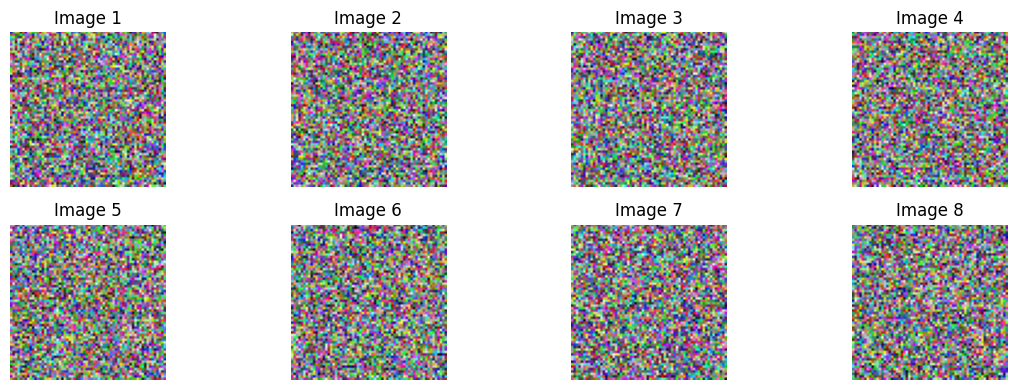

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 4D 텐서 생성 (batch=8, height=64, width=64, channels=3)
image_batch = np.random.rand(8, 64, 64, 3)  # 값 범위: 0~1

# 2. 이미지 시각화 (한 줄에 4장씩 출력)
plt.figure(figsize=(12, 4))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image_batch[i])  # RGB 형식
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

##### 5차원 텐서
- 임의의 random-noise로 영상 만들기

In [ ]:
import numpy as np
import cv2
from google.colab import files

# 1. 임의의 5차원 텐서 생성 (1개 배치, 30프레임, 64x64 RGB)
video_tensor = np.random.rand(1, 30, 64, 64, 3) * 255
video_tensor = video_tensor.astype(np.uint8)

# 2. 영상 저장 (OpenCV)
video_filename = 'random_noise.mp4'
out = cv2.VideoWriter(video_filename, cv2.VideoWriter_fourcc(*'mp4v'), 10, (64, 64))

for frame in video_tensor[0]:  # batch 0번 사용
    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # OpenCV는 BGR 순서
    out.write(frame_bgr)

out.release()

# 3. Colab에서 로컬 다운로드
files.download(video_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
# 노션에 붙여보게 gif시도
import numpy as np
import imageio

# 1. 임의의 5차원 텐서 생성 (1개 배치, 30프레임, 64x64 RGB)
video_tensor = np.random.rand(1, 30, 256, 256, 3) * 255
video_tensor = video_tensor.astype(np.uint8)

# 텐서에서 프레임 추출
frames = [frame for frame in video_tensor[0]]  # shape: (30, 64, 64, 3)

# imageio로 gif 저장
gif_filename = 'random_noise.gif'
imageio.mimsave(gif_filename, frames, fps=10)

# 다운로드
from google.colab import files
files.download(gif_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 노드04-02 텐서 타입 및 변환

##### 텐서의 생성

In [ ]:
i = tf.constant(2)
print(i)

tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
f = tf.constant(2.)
print(f)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
s = tf.constant('Suan')
print(s)

tf.Tensor(b'Suan', shape=(), dtype=string)


In [ ]:
f16 = tf.constant(2., dtype=tf.float16)
print(f16)

tf.Tensor(2.0, shape=(), dtype=float16)


In [ ]:
# Q. 8비트의 정수형을 지정하여 텐서를 생성해 보세요.
# [[YOUR CODE]]

f8 = tf.constant(int(2.0), dtype=tf.int8) # 명시적으로 int(2.0)으로 맞춰줘야 함!
print(f8)

tf.Tensor(2, shape=(), dtype=int8)


##### 텐서의 변환

In [ ]:
f32 = tf.cast(f16, tf.float32)
print(f32)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
#  Q. 8비트 정수형을 32비트 정수형으로 변환해 보세요.
# [[YOUR CODE]]

f8 = tf.constant(2, dtype=tf.int8) # 8비트 정수형
f32_cast = tf.cast(f8, tf.float32)
print(f32_cast)

tf.Tensor(2.0, shape=(), dtype=float32)


##### 텐서 형상 변환

In [ ]:
x = tf.constant([[1], [2], [3]])
print(x)
print(x.shape)

y = tf.reshape(x, [1, 3])
print(y)
print(y.shape)

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
(3, 1)
tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
(1, 3)


##### 텐서 전치

In [ ]:
print(y)
print(tf.transpose(y))
print(y.shape)

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
(1, 3)


##### 차원 압축

In [ ]:
print(x)
print(tf.squeeze(x))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)


##### 텐서 함수 연습해보기

In [ ]:
# [Playground]] 다양한 텐서 함수를 연습해 보세요.
# [[YOUR CODE]]

z = tf.constant([[1],[2],[3],[4]])
print(tf.size(z)) # size 확인하기
print(tf.rank(z)) # rank 확인하기

z_reshape = tf.reshape(z,[2,2]) # 2행 2열로 변환?
print(tf.size(z_reshape))
print(tf.rank(z_reshape))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


####노드04-03 텐서 연산

##### 0차원 텐서 연산

In [ ]:
print(tf.constant(2) + tf.constant(2))
print(tf.constant(2) - tf.constant(2))
print(tf.add(tf.constant(2), tf.constant(2)))
print(tf.subtract(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
print(tf.constant(2) * tf.constant(2))
print(tf.constant(2) / tf.constant(2))
print(tf.multiply(tf.constant(2), tf.constant(2)))
print(tf.divide(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)


##### 1차원 텐서 연산

In [ ]:
# 임의로 1차원 텐서 생성
a = tf.constant([1,2,3,4])
b = tf.constant([5,6,7,8])

print(a)
print(b)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)


In [ ]:
# Q. 사칙연산(더하기, 빼기, 곱하기, 나누기)을 해보세요.
# [[YOUR CODE]]

a = tf.constant([1,2,3,4])
b = tf.constant([5,6,7,8])

print(a+b)
print(tf.add(a,b))
print(a-b)
print(tf.subtract(a,b))
print(a*b)
print(tf.multiply(a,b))
print(a/b)
print(tf.divide(a,b))

tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)
tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)
tf.Tensor([-4 -4 -4 -4], shape=(4,), dtype=int32)
tf.Tensor([-4 -4 -4 -4], shape=(4,), dtype=int32)
tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)
tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)
tf.Tensor([0.2        0.33333333 0.42857143 0.5       ], shape=(4,), dtype=float64)
tf.Tensor([0.2        0.33333333 0.42857143 0.5       ], shape=(4,), dtype=float64)


##### 2차원 텐서 연산

In [ ]:
# 임의로 2차원 텐서 생성
a = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
b = tf.constant([[-1,-2,4],[-4,-5,6],[-7,-8,9]])

print(a)
print(b)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[-1 -2  4]
 [-4 -5  6]
 [-7 -8  9]], shape=(3, 3), dtype=int32)


In [ ]:
a = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
b = tf.constant([[-1,-2,4],[-4,-5,6],[-7,-8,9]])

print(a + b) # element-wise addition
print(a - b) # element-wise subtraction
print(a * b) # element-wise multiplication
print(a @ b) # matrix multiplication
print(a / b) # element-wise division

tf.Tensor(
[[ 0  0  7]
 [ 0  0 12]
 [ 0  0 18]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[ 2  4 -1]
 [ 8 10  0]
 [14 16  0]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[ -1  -4  12]
 [-16 -25  36]
 [-49 -64  81]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[ -30  -36   43]
 [ -66  -81  100]
 [-102 -126  157]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[-1.   -1.    0.75]
 [-1.   -1.    1.  ]
 [-1.   -1.    1.  ]], shape=(3, 3), dtype=float64)


In [ ]:
print(tf.add(a, b))
print(tf.subtract(a, b))
print(tf.multiply(a, b))
print(tf.matmul(a, b))
print(tf.divide(a, b))

tf.Tensor(
[[ 0  0  7]
 [ 0  0 12]
 [ 0  0 18]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[ 2  4 -1]
 [ 8 10  0]
 [14 16  0]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[ -1  -4  12]
 [-16 -25  36]
 [-49 -64  81]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[ -30  -36   43]
 [ -66  -81  100]
 [-102 -126  157]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[-1.   -1.    0.75]
 [-1.   -1.    1.  ]
 [-1.   -1.    1.  ]], shape=(3, 3), dtype=float64)


### 노드05 딥러닝 구조와 모델

####노드05-01 딥러닝 구조와 레이어
- 모델 구조 : 케라스에서 제공하는 API들의 구성도를 살펴보면, 크게 Model API와 Layer API가 있고 필요한 모듈들을 Modules API를 호출해서 사용
- 딥러닝은 입력층, 은닉층, 출력층으로 구성됨
- Dense 레이어는 완전연결계층(Fully-Connected Layer)으로 노드수(유닛수)를 지정하면 생성
- Activation 레이어 : 활성화 함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할을 하는데, 크게 선형 활성화 함수(Linear activation function)와    비선형 활성화 함수(Non-linear activation function)로 구분
  - 시그모이드 함수
  - 하이퍼볼릭 탄젠트 함수
  - ReLU함수
  - Leaky ReLU 함수
- Flatten 레이어는 **배치 차원(batch dimension)을 제외한 나머지 차원을 모두 1차원으로 평탄화(flatten)**하는 역할을 합니다.
  - 예를 들어, 입력 데이터가 (batch_size, height, width, channels) 형태라면, Flatten 이후에는 (batch_size, height × width × channels) 형태의 2차원 텐서가 됩니다.
  - MLP(다층 퍼셉트론) 모델에서는 2D 또는 3D 형태의 입력을 1차원 벡터로 변환하여 Dense 층에 전달하기 위해 Flatten을 사용합니다.
  - CNN(합성곱 신경망) 모델에서는 합성곱 및 풀링 계층을 거친 후 Fully Connected(완전 연결) 계층에 입력할 때 Flatten을 사용합니다.CNN은 초기에는 이미지의 차원(height, width, channels)을 그대로 유지한 채 처리하고, 마지막에만 Flatten을 수행합니다.

##### 선형 함수

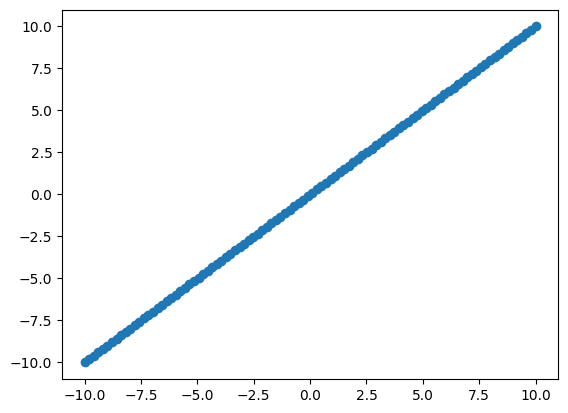

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

##### sigmoid 함수

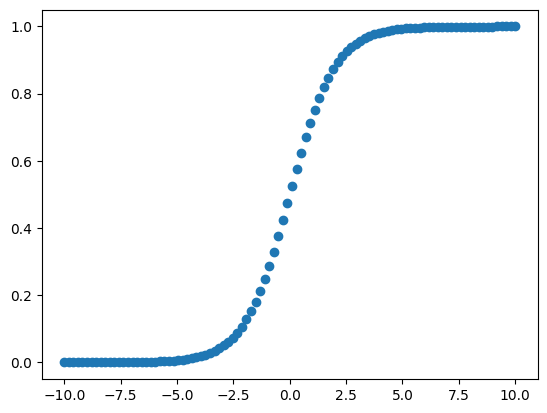

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

##### 하이퍼볼릭 탄젠트 함수

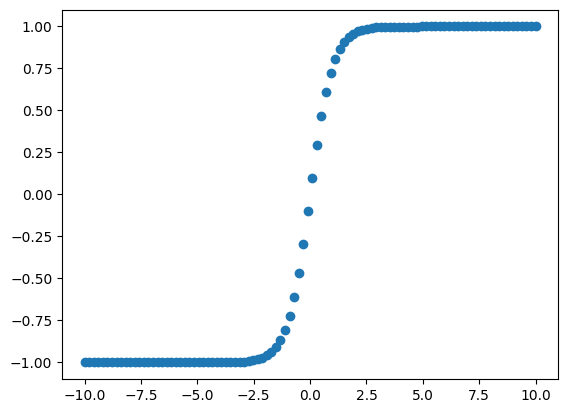

In [ ]:
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

##### ReLU 함수

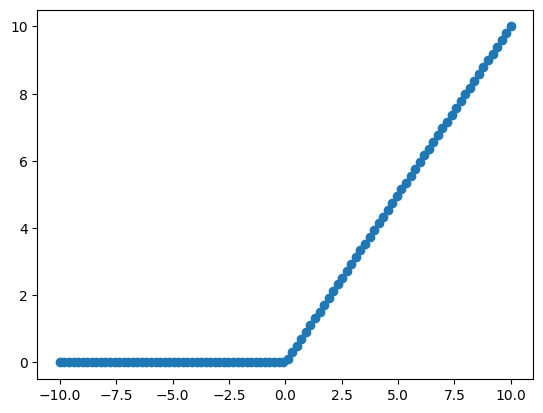

In [ ]:
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

##### Leaky ReLU 함수

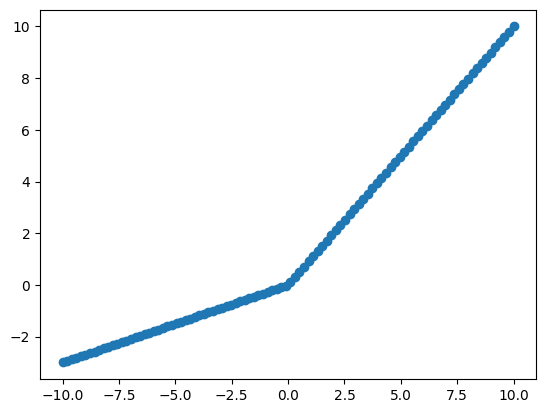

In [ ]:
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

##### ELU 함수
- ELU(Exponential Linear Unit) 함수는 ReLU가 중심점이 0이 아니고, 노드 출력을 0으로만 하던 문제를 해결한 활성화 함수

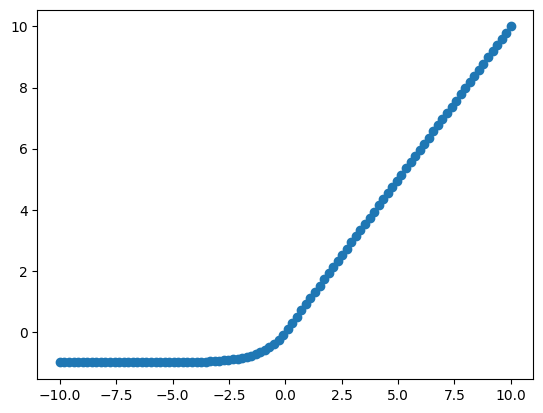

In [ ]:
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

##### Flatten layer
- Flatten 레이어는 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환
- 아래 예시에서 224 x 224 형태의 데이터를 flatten 레이어 통해 50176의 1차원 형태로 변형한 것을 확인 가능

In [ ]:
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten()(inputs)
print(layer.shape)

(None, 50176)


####05-02 딥러닝 모델
- Sequential API
- Functional API
- Subclassing API

##### Sequential API

In [ ]:
from tensorflow.keras import models, utils

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 28, 300)        │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28, 10)         │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,810 (155.51 KB)

 Trainable params: 39,810 (155.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 28, 300)        │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 28, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 28, 10)         │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,810 (155.51 KB)

 Trainable params: 39,810 (155.51 KB)

 Non-trainable params: 0 (0.00 B)

##### Functional API

In [ ]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

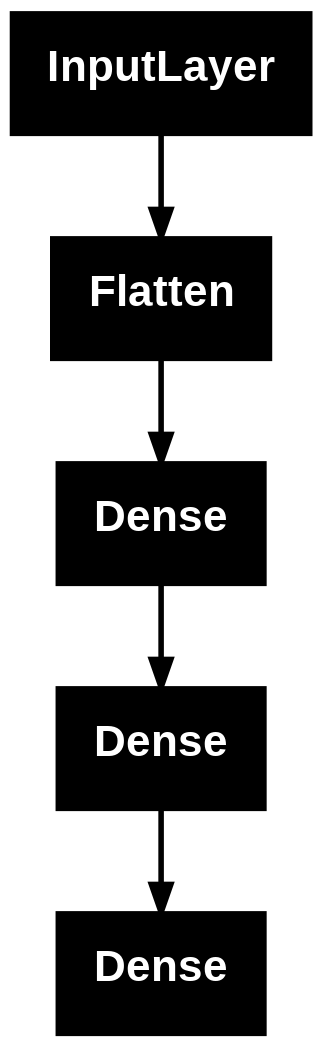

In [ ]:
utils.plot_model(model)

In [ ]:
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 28, 100)   │      2,900 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 28, 30)    │      3,030 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 58)    │          0 │ input_layer_3[0]… │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 28, 1)     │         59 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,989 (23.39 KB)

 Trainable params: 5,989 (23.39 KB)

 Non-trainable params: 0 (0.00 B)

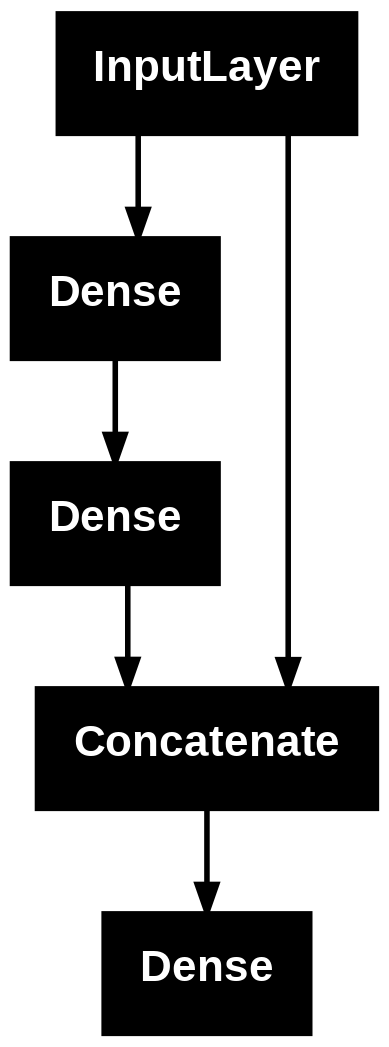

In [ ]:
utils.plot_model(model)

In [ ]:
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_2             │ (None, 10, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 10, 100)   │      2,900 │ Input_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input_1             │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 10, 20)    │          0 │ Input_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 10, 1)     │         21 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,931 (15.36 KB)

 Trainable params: 3,931 (15.36 KB)

 Non-trainable params: 0 (0.00 B)

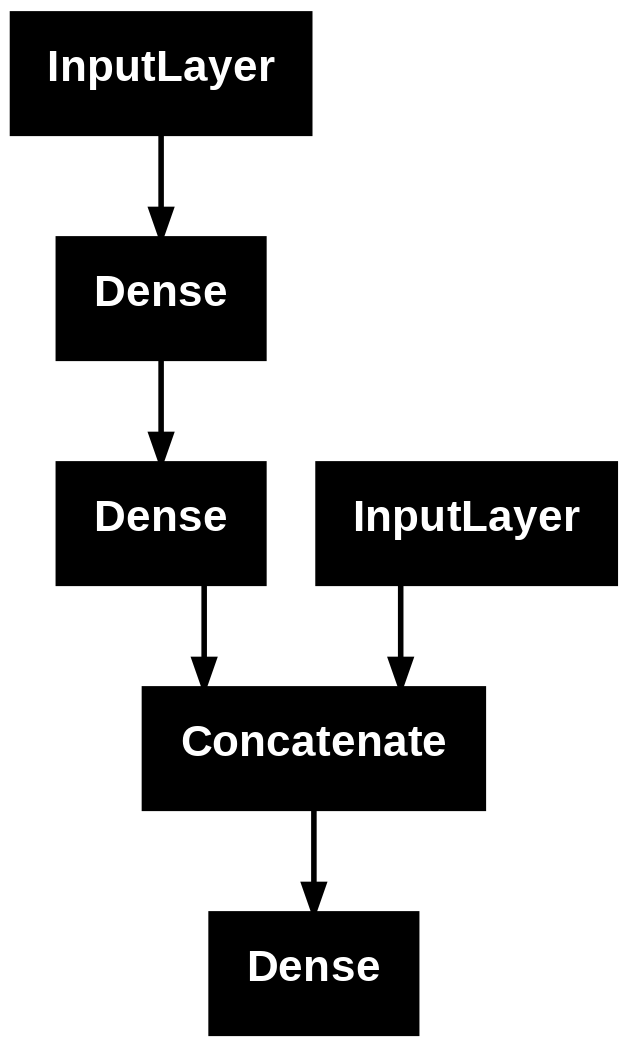

In [ ]:
utils.plot_model(model)

##### Subclassing API
- 서브클래싱(Subclassing) 방법은 커스터마이징에 최적화된 방법으로, Model 클래스를 상속받아서 사용하고 모델에 포함되는 다음과 같은 기능을 사용
  - fit( ): 모델 학습
  - evaluate( ) : 모델 평가
  - predict( ) : 모델 예측
  - save( ) : 모델 저장
  - load( ) : 모델 불러오기
  - call( ) : 메소드 안에서 원하는 계산 가능

In [68]:
# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

##### 연습해보기(API구현)

In [65]:
## Sequential API 연습
from tensorflow.keras import models, utils
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Input(shape=(100, 100,3)))

# Flatten 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Flatten())

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Dense(400, activation = 'relu'))

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Dense(200, activation = 'relu'))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 400)            │    12,000,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,100,700 (46.16 MB)

 Trainable params: 12,100,700 (46.16 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape = (100,100,3))

# Flatten 레이어를 쌓으세요.
x = layers.Flatten(input_shape = (100,100,3))(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation = 'relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation = 'relu')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation = 'softmax')(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 400)            │    12,000,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,100,700 (46.16 MB)

 Trainable params: 12,100,700 (46.16 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten(input_shape = (100,100,3))
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation = 'relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation = 'relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation = 'softmax')

  def call(self, inputs):
    # Flatten 레이어를 a통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (1, 30000)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (1, 400)               │    12,000,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (1, 200)               │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (1, 100)               │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,100,700 (46.16 MB)

 Trainable params: 12,100,700 (46.16 MB)

 Non-trainable params: 0 (0.00 B)

### 06 딥러닝 모델 학습
- 여기서의 예시는 GPU 가속이 필요한 수준은 아님

####06-01 손실함수(Loss Function)
- 손실함수 역할
  - 손실함수는 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표로서 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표가 됩니다. 손실 함수에 따른 결과를 통해 파라미터를 조정하며 학습이 진행됩니다.손실함수는 최적화 이론에서 최소화 하고자 하는 함수로 미분 가능한 함수를 사용합니다.
- MSE
- MAE
- "categorical_cross_entropy"
- 2진분류, 교차 크로스 엔트로피 값 계산


#### 06-02 옵티마이저(Optimizer)와 지표
- 경사하강법 역할?
  - 옵티마이저는 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정합니다.Keras에서 여러 옵티마이저를 제공하고, 사용자는 특정 종류의 확률적 경사 하강법을 지정할 수 있습니다.
- 왜 경사하강법으로는 안장점(Saddle point)에서 벗어나지 못할까요?
  - 기울기의 반대 방향으로 다음 위치를 이동해야하는데 기울기 값이 0이라 이동하지 못합니다.
- 학습률은 어디에 사용되고 잘못 설정한 경우 어떤 문제가 발생할 수 있나요?
  - 경사하강법을 통해 손실함수의 반대 기울기 방향으로 업데이트 할 때 업데이트 되는 크기에 관여하며 잘못 설정한 경우 손실함수의 최저점에 도달하지 못할 수 있습니다.

####06-03 딥러닝 모델 학습
- 딥러닝 모델 학습은 어떻게 진행되는가?
  - 먼저 데이터셋을 입력, X와 실제 정답(레이블)인 Y로 구분합니다.
  - 입력 데이터는 연속된 레이어로 구성된 네트워크(모델)를 통해 결과로 Y' 예측
  - 손실 함수는 모델이 예측한 Y'와 실제 정답인 Y 비교하여 '얼마나 차이가 나는지' 손실 값 계산
  - 옵티마이저는 손실 값을 사용하여 모델의 가중치를 업데이트 하는 과정 수행
  - 모델이 새롭게 예측한 Y'와 실제 정답인 Y의 차이를 측정하는 손실 값을 계산하는 과정 반복
  - 계산한 손실값을 최소화하도록 옵티마이저가 동작하는 것이 딥러닝 모델 학습

##### 데이터 생성

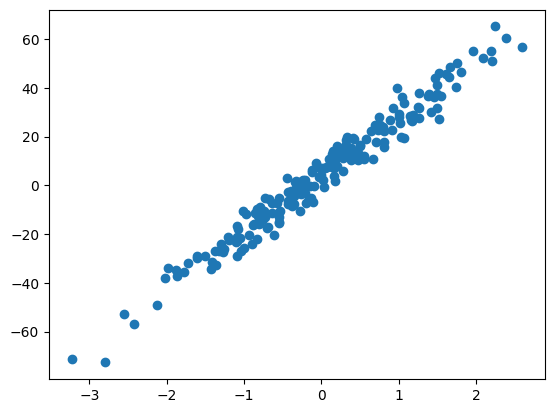

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1,
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


##### 모델 생성

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

##### 모델 학습

In [ ]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 646.0405 - mae: 20.0131 - mse: 646.0405 
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 518.8293 - mae: 18.3407 - mse: 518.8293 
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 398.2354 - mae: 15.8894 - mse: 398.2354 
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 289.3234 - mae: 13.6972 - mse: 289.3234
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 244.3700 - mae: 12.4038 - mse: 244.3700 
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 196.7272 - mae: 11.4067 - mse: 196.7272
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 175.9995 - mae: 10.5717 - mse: 175.9995 
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 125.7504 - mae: 9.1956 - mse: 125.7504  
Epoch 9/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 115.0949 - mae: 8.5251 - mse: 115.0949  
Epoch 10/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 104.3839 - mae: 8.2925 - mse: 104.3839 
Epoch 11/40
5/5 ━━━━━━━━━━━━

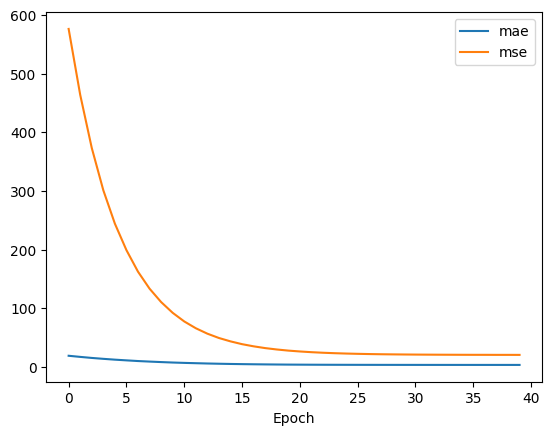

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

##### 모델 평가

In [ ]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 21.7494 - mae: 3.9621 - mse: 21.7494 


[21.908370971679688, 3.987142562866211, 21.908370971679688]

##### 모델 예측

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


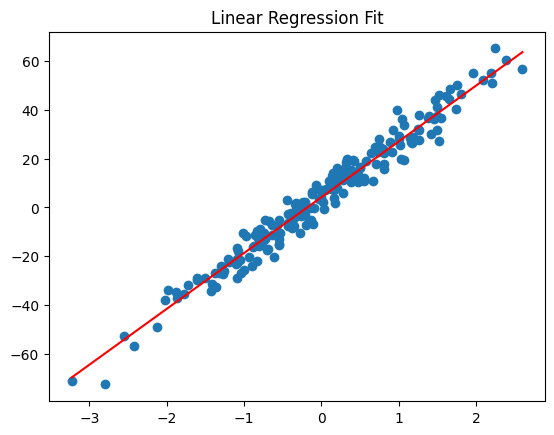

In [56]:
result = model.predict(X)

# 정렬된 X, result로 plot
sorted_idx = np.argsort(X[:, 0])
X_sorted = X[sorted_idx]
result_sorted = result[sorted_idx]

plt.scatter(X, y)
plt.plot(X_sorted, result_sorted, 'r')  # 이제 선형 회귀선이 깔끔하게 나옴
plt.title("Linear Regression Fit")
plt.show()

In [59]:
layer = model.layers[0]
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.907675]]
[4.1814404]


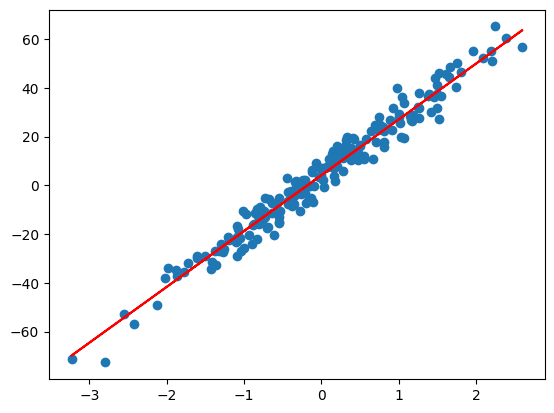

In [60]:
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()